In [24]:
import torch
from labels import *
pathogen = 2

shap_values = torch.load(f'/home/yhchoi/FSTrain_0205/shap_values_pathogen{pathogen}.pt')

In [25]:
# All labels
lllll = [
# Unwanted labels
# 'Lateral-Ventricle',  
# 'Inf-Lat-Vent',
# '3rd-Ventricle',
# '4th-Ventricle',
# 'CSF',
  
# Cerebellum
['Cerebellum-White-Matter',
'Cerebellum-Cortex'],

# Medial Temporal Lobe
['Hippocampus',
 'parahippocampal',
 'entorhinal'],

# Amygdala
['Amygdala'],

# Thalamus
['Thalamus-Proper'],

# Ventral Dienchephalon
['VentralDC'],

# Choroid Plexus
['Choroid-plexus'],

# Basal Ganglia
['Accumbens-area',
 'Caudate',
 'Putamen',
 'Pallidum'
],

# Brain Stem
['Brain-Stem'],

# Frontal Lobe
['caudalmiddlefrontal',
'lateralorbitofrontal',
'medialorbitofrontal',
'rostralmiddlefrontal',
'superiorfrontal',
'parsorbitalis',
'parsopercularis',
'parstriangularis',
'precentral'],

# Occipital Lobe
['cuneus',
'lateraloccipital',
'pericalcarine',
'lingual'
],

# Temporal Lobe
['fusiform',
'inferiortemporal', 
'middletemporal',
'superiortemporal',
'transversetemporal'],

# Parietal Lobe
['paracentral',
 'postcentral',
 'inferiorparietal',
 'precuneus',
 'superiorparietal',
 'supramarginal'],

# Cortical Limbic System
['caudalanteriorcingulate',
 'rostralanteriorcingulate',
 'isthmuscingulate',
 'posteriorcingulate'
],

# Insular Cortex
['insula']
]

size_featvecs_all = []
# [3328 * len(sublist) if sublist != ['Brain-Stem'] else 1664 for sublist in lllll]

featurenames_all = [
    'Cerebellum', 
    'Medial Temporal Lobe',
    'Amygdala',
    'Thalamus',
    'Ventral Diencephalon',
    'Choroid Plexus',
    'Basal Ganglia',
    'Brain Stem',
    'Frontal Lobe',
    'Occipital Lobe',
    'Temporal Lobe',
    'Parietal Lobe',
    'Cortical Limbic System',
    'Insular Cortex',
]

clinical_featnames_all = torch.load('/home/yhchoi/FSTrain_0205/samplevectors_internal/feature_names.pt')

################  '0:Cerebellum',       '1:Medial Temporal Lobe',   '2:Amygdala',                   '3:Thalamus',       '4:Ventral Dienchephalon', 
################  '5:Choroid Plexus',   '6:Basal Ganglia',          '7:Brain Stem',                 '8:Frontal Lobe',   '9:Occipital Lobe', 
################  '10:Temporal Lobe',   '11:Parietal Lobe',         '12:Cortical Limbic System',    '13:Insular Cortex'
parts_to_select_mri_dict = {
    0: [1, 3, 4, 5, 6, 8, 9, 10, 11, 12],
    1: [0, 3, 4, 6, 7, 9, 10, 11, 12, 13],
    2: [1, 2, 3, 5, 6, 8, 9, 11, 12, 13],
    3: [0, 1, 2, 3, 4, 5, 7, 9, 10, 13]
}

parts_to_select_clinical_dict = {
    0: [63, 61, 22, 2, 46, 64, 65, 21, 29, 0, 20, 67, 62, 27, 49, 66, 25, 1, 54, 59, 4, 57, 28, 30, 24, 34, 26, 8, 16, 5],
    1: [67, 66, 62, 61, 46, 33, 1, 31, 21, 32, 49, 16, 64, 43, 17, 38, 27, 20, 0, 26, 5, 53, 24, 29, 10, 30, 4, 63, 28, 12],
    2: [63, 46, 1, 62, 0, 20, 61, 2, 32, 26, 29, 5, 65, 56, 30, 66, 49, 53, 31, 64, 67, 24, 28, 60, 15, 9, 48, 52, 13, 21],
    3: [49, 0, 2, 67, 31, 46, 26, 61, 1, 62, 27, 32, 29, 64, 22, 4, 33, 63, 58, 52, 30, 5, 48, 66, 20, 39, 53, 43, 65, 56]
}

parts_to_select = parts_to_select_mri_dict[pathogen]
brainpart_names = []
for part in parts_to_select:
    brainpart_names += lllll[part]

clinical_features = parts_to_select_clinical_dict[pathogen]
size_featvecs_all = []
for label in brainpart_names:
    if label == 'Brain-Stem':
        size_featvecs_all.append(1664)
    else:
        size_featvecs_all += [1664, 1664]
size_featvecs_all += [1] * 30

In [26]:
parts_selected = []
size_featvecs = []
featurenames = []

for i in parts_to_select:
            parts_selected += lllll[i]
            size_featvecs.append(size_featvecs_all[i])
            featurenames.append(featurenames_all[i])

feat_vecs = []
feat_vecs_test = []


featurenames = []


for part_to_segment in parts_selected:
        labels_nlr = label_lookups(part_to_segment, 'left') == label_lookups(part_to_segment, 'right')
        part_to_segment = part_to_segment.replace('-', '_')
        if labels_nlr:
            featurenames.append(f'{part_to_segment}')
        else:
            featurenames.append(f'{part_to_segment}_left')
            featurenames.append(f'{part_to_segment}_right')

# featurenames += ['Demographic',
#     'Modalities',
#     'Vital',
#     'CSF',
#     'Urine',
#     'Serum']
featurenames += [clinical_featnames_all[clinical_feature] for clinical_feature in clinical_features]

In [27]:
data = torch.tensor(torch.load(f'/home/yhchoi/FSTrain_0205/samplevectors/{pathogen}/labels_test.pt')).unsqueeze(1)

data_all_list = []
for feature in featurenames:
    data_all_list.append(data)

data_all = torch.cat(data_all_list, dim=1)

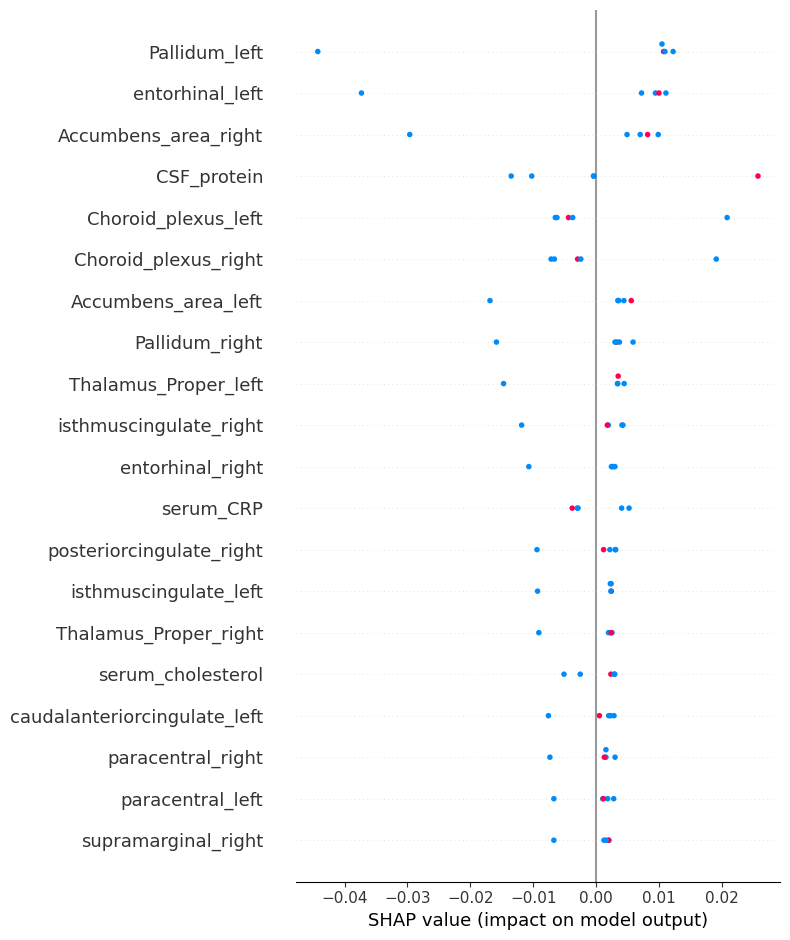

In [28]:
import shap
shap.summary_plot(shap_values.cpu().numpy(), data_all, feature_names=featurenames, max_display=20, color_bar=False, show=True)

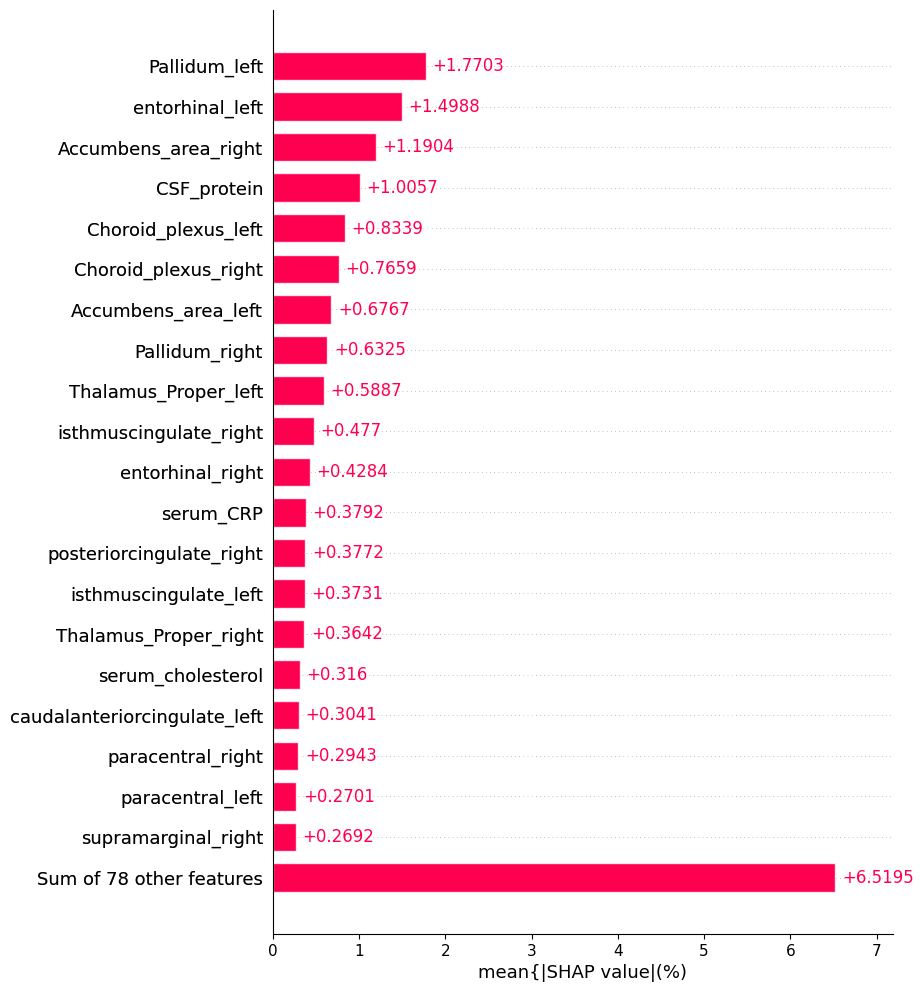

In [29]:
import matplotlib.pyplot as plt
e = shap.Explanation((shap_values * 100).cpu().numpy(), feature_names=featurenames)
shap.plots.bar(e, max_display=21, show=False)
plt.xlabel('mean{|SHAP value|(%)')
plt.format_values="{:.4f}"
plt.show()

In [30]:
n  = 63

explanation = shap.Explanation(values=(shap_values * 100).cpu().numpy(), base_values=0, feature_names=featurenames)
shap.waterfall_plot(explanation[n], max_display=100, show=False)
plt.show()

IndexError: index 63 is out of bounds for axis 0 with size 5

In [ ]:
import numpy as np

print(np.__version__)

1.24.4
